<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Metadata" data-toc-modified-id="Metadata-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Metadata</a></span></li><li><span><a href="#Trees" data-toc-modified-id="Trees-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Trees</a></span></li><li><span><a href="#Bracken-counts" data-toc-modified-id="Bracken-counts-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Bracken counts</a></span><ul class="toc-item"><li><span><a href="#Joining" data-toc-modified-id="Joining-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Joining</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Calc-alpha-div-per-clade" data-toc-modified-id="Calc-alpha-div-per-clade-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Calc alpha div per clade</a></span></li><li><span><a href="#lmer:-full-dataset" data-toc-modified-id="lmer:-full-dataset-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>lmer: full dataset</a></span><ul class="toc-item"><li><span><a href="#Plotting" data-toc-modified-id="Plotting-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Plotting</a></span></li></ul></li><li><span><a href="#lmer:-westernized-+-age-+-gender" data-toc-modified-id="lmer:-westernized-+-age-+-gender-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>lmer: westernized + age + gender</a></span><ul class="toc-item"><li><span><a href="#Plotting" data-toc-modified-id="Plotting-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Plotting</a></span><ul class="toc-item"><li><span><a href="#Westernization" data-toc-modified-id="Westernization-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Westernization</a></span></li><li><span><a href="#Gender" data-toc-modified-id="Gender-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span>Gender</a></span></li><li><span><a href="#Age" data-toc-modified-id="Age-7.1.3"><span class="toc-item-num">7.1.3&nbsp;&nbsp;</span>Age</a></span></li></ul></li></ul></li><li><span><a href="#lmer:-westernized-+-age-+-gender-+-disease" data-toc-modified-id="lmer:-westernized-+-age-+-gender-+-disease-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>lmer: westernized + age + gender + disease</a></span><ul class="toc-item"><li><span><a href="#Plotting" data-toc-modified-id="Plotting-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Plotting</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Investigate which specific clades differ most by westernization in regards to diversity

# Var

In [1]:
# working dir
work_dir = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/'

# bracken counts
brk_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/bracken_filt2.qs'

# metadata
## filtered
#metadata_filt_file = file.path(work_dir, 'CurMetDat_metadata_filt-n1846.tsv')
## all 
base_in_dir = '/ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval/'
metadata_file = file.path(base_in_dir, 'CurMetDat-metagenomes', 'files', 'metadata', 'Filtered_CurMetDat_ff.tsv')

# ref genome metadata (GTDBr89 metadata)
genome_meta_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/metadata_1per-GTDB-Spec_gte50comp-lt5cont_wtaxID_wPath.tsv'

# metagenome profiling dir
profile_dir = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/LLMGP/'

# phylogeny
phy_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/phylogeny/ar122-bac120_r89_1per-GTDB-Spec_gte50comp-lt5cont_rn.nwk'
## Trait 
phy_trt_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/predictions_flat_majority-votes_combined_jaccard_rn.nwk'
## COG content
phy_cog_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/genes-per-COG_UniRef90_bray.nwk'
phy_cogcat_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/genes-per-COGcat_UniRef90_bray.nwk'
## pfam content
phy_pfam_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/genes-per-pfam_UniRef90_bray.nwk'
phy_pfamcat_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/genes-per-pfamGrp_UniRef90_bray.nwk'

# params
threads = 12

# Init

In [5]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(ape)
library(phyloseq)
library(vegan)
library(PhyloMeasures)
library(lme4)
library(lmerTest)
library(LeyLabRMisc)

In [6]:
make_dir(work_dir)
setDTthreads(threads)
df.dims()

Directory already exists: /ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/ 


# Load

## Metadata

In [7]:
# all 
meta = fread(metadata_file, sep='\t', check.names=TRUE) %>%
    mutate.(disease_status = ifelse(disease != 'healthy', 'diseased', disease)) %>%
    select.(Sample, dataset_name, subjectID, study_condition, 
              disease, disease_status, age, gender, BMI, westernized)
meta %>% unique_n('Samples', Sample)
meta %>% unique_n('Datasets', dataset_name)
meta

No. of unique Samples: 2943 
No. of unique Datasets: 30 


Sample,dataset_name,subjectID,study_condition,disease,disease_status,age,gender,BMI,westernized
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<lgl>
TRAVELRES1,Bengtsson-PalmeJ_2015,TRAVELRES1_2,control,healthy,healthy,25,female,NA,TRUE
TRAVELRES11,Bengtsson-PalmeJ_2015,TRAVELRES11_12,control,healthy,healthy,22,female,NA,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
PNP_Validation_45,ZeeviD_2015,PNP_Validation_45,control,healthy,healthy,NA,,NA,TRUE
PNP_Validation_46,ZeeviD_2015,PNP_Validation_46,control,healthy,healthy,NA,,NA,TRUE


In [8]:
# genome metadata
genome_meta = fread(genome_meta_file, sep='\t') %>%
    select.(ncbi_genbank_assembly_accession, ncbi_organism_name, gtdb_taxonomy, 
            accession) %>%
    rename.('GTDB_accession' = accession) %>%
    separate.(gtdb_taxonomy, taxonomy_levels(), sep=';') %>%
    mutate.(Species = gsub(' ', '_', Species))

genome_meta %>% unique_n('accessions', ncbi_genbank_assembly_accession)
genome_meta

No. of unique accessions: 23360 


ncbi_genbank_assembly_accession,ncbi_organism_name,GTDB_accession,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GCA_002789635.1,GB_GCA_002789635.1_Candidatus Aenigmarchaeota archaeon CG_4_9_14_3_um_filter_37_18,GB_GCA_002789635.1,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__CG10238-14,s__CG10238-14_sp002789635
GCA_001784635.1,GB_GCA_001784635.1_Candidatus Micrarchaeota archaeon RBG_16_49_10,GB_GCA_001784635.1,d__Archaea,p__Aenigmarchaeota,c__Aenigmarchaeia,o__CG10238-14,f__CG10238-14,g__RBG-16-49-10,s__RBG-16-49-10_sp001784635
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GCA_001775395.1,GB_GCA_001775395.1_candidate division Zixibacteria bacterium RBG_16_53_22,GB_GCA_001775395.1,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UBA10806,f__UBA10806,g__UBA10806,s__UBA10806_sp001775395
GCA_002791595.1,GB_GCA_002791595.1_candidate division Zixibacteria bacterium CG_4_9_14_3_um_filter_46_8,GB_GCA_002791595.1,d__Bacteria,p__Zixibacteria,c__MSB-5A5,o__UM-FILTER-46-8,f__UM-FILTER-46-8,g__UM-FILTER-46-8,s__UM-FILTER-46-8_sp002791595


## Trees

In [9]:
# Genome phylogeny
gtdb_phy = read.tree(phy_file)
gtdb_phy


Phylogenetic tree with 23360 tips and 23359 internal nodes.

Tip labels:
  s__Halorubrum_sp000296615, s__Halorubrum_distributum, s__Halorubrum_trapanicum, s__Halorubrum_tropicale, s__Halorubrum_coriense, s__Halorubrum_ezzemoulense, ...
Node labels:
  100.0, d__Archaea100.0, 97.0, 99.0, 100.0, 100.0-p__Halobacterota, ...

Rooted; includes branch lengths.

In [10]:
# traitar trait dendrogram
trt_phy = read.tree(phy_trt_file)
trt_phy


Phylogenetic tree with 23360 tips and 23359 internal nodes.

Tip labels:
  s__Mikella_endobia, s__Prochlorococcus_B_sp003284185, s__Prochlorococcus_A_sp003282425, s__Eperythrozoon_A_wenyonii_A, s__GN02-872_sp003260325, s__SZUA-486_sp003251635, ...

Rooted; includes branch lengths.

In [11]:
# cog dendrogram
cog_phy = read.tree(phy_cog_file)
cog_phy


Phylogenetic tree with 23360 tips and 23359 internal nodes.

Tip labels:
  s__UBA9959_sp001799795, s__2-02-FULL-45-21_sp001805845, s__UBA11600_sp002717745, s__UBA11600_sp002714165, s__UBA11600_sp002730735, s__LS-NOB_sp002705185, ...

Rooted; includes branch lengths.

In [12]:
# pfam dendrogram
pfam_phy = read.tree(phy_pfam_file)
pfam_phy


Phylogenetic tree with 23358 tips and 23357 internal nodes.

Tip labels:
  s__Acinetobacter_gerneri, s__Enterococcus_sp002174455, s__Cnuella_takakiae, s__Marinomonas_primoryensis, s__Kosakonia_oryzendophytica, s__Roseomonas_cervicalis, ...

Rooted; includes branch lengths.

In [13]:
# checking key overlap
overlap(gtdb_phy$tip.label, trt_phy$tip.label)

intersect(x,y): 23360 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 23360 


In [14]:
# checking key overlap
overlap(gtdb_phy$tip.label, cog_phy$tip.label)

intersect(x,y): 23360 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 23360 


In [15]:
# checking key overlap
overlap(gtdb_phy$tip.label, pfam_phy$tip.label)

intersect(x,y): 23358 
setdiff(x,y): 2 
setdiff(y,x): 0 
union(x,y): 23360 


## Bracken counts

In [16]:
# reading in bracken counts
brk_cls = qs::qread(brk_file, nthreads=threads) %>%
    mutate.(name = name %>% gsub(' ', '_', .))
brk_cls

dataset,name,taxonomy_id,taxonomy_lvl,Domain,Phylum,Class,Order,Family,Genus,Species,Sample,Abundance
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
CosteaPI_2017,s__Caecibacter_massiliensis,108259,S,Bacteria,Firmicutes_C,Negativicutes,Veillonellales,Megasphaeraceae,Caecibacter,Caecibacter massiliensis,halbarad.11.0.0,0
CosteaPI_2017,s__UBA1777_sp002350825,178550,S,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Oscillospiraceae,UBA1777,UBA1777 sp002350825,halbarad.11.0.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YuJ_2015,s__Serratia_grimesii,121568,S,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Serratia,Serratia grimesii,SZAXPI017592.142,0
YuJ_2015,s__Bacteroides_A_sp002161565,119189,S,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides_A,Bacteroides_A sp002161565,SZAXPI017592.142,0


In [17]:
# overlap with ref genome metadata
overlap(brk_cls, genome_meta, name, Species)

intersect(x,y): 3550 
setdiff(x,y): 0 
setdiff(y,x): 19810 
union(x,y): 23360 


In [18]:
# overlap with sample IDs
overlap(brk_cls, meta, Sample, Sample)

intersect(x,y): 2943 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 2943 


In [19]:
# overlap with sample IDs
#overlap(brk_cls, meta_f, Sample, Sample)

In [20]:
# checking overlap with phylogeny tip labels
overlap(brk_cls, gtdb_phy$tip.label, name)

intersect(x,y): 3550 
setdiff(x,y): 0 
setdiff(y,x): 19810 
union(x,y): 23360 


### Joining

In [21]:
# just overlapping samples with metadata
brk_cls = brk_cls %>%
    inner_join.(meta %>% rename.('dataset' = dataset_name), 
                by=c('Sample', 'dataset'))
brk_cls %>% unique_n('Samples', Sample)
brk_cls

No. of unique Samples: 2943 


dataset,name,taxonomy_id,taxonomy_lvl,Domain,Phylum,Class,Order,Family,Genus,⋯,Sample,Abundance,subjectID,study_condition,disease,disease_status,age,gender,BMI,westernized
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<lgl>
Bengtsson-PalmeJ_2015,s__An200_sp003268275,146203,S,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Acutalibacteraceae,An200,⋯,TRAVELRES1,0,TRAVELRES1_2,control,healthy,healthy,25,female,NA,TRUE
Bengtsson-PalmeJ_2015,s__Prevotella_sp900107705,172643,S,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Prevotella,⋯,TRAVELRES1,0,TRAVELRES1_2,control,healthy,healthy,25,female,NA,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZeeviD_2015,s__UBA2813_sp900319365,118664,S,Bacteria,Cyanobacteria,Vampirovibrionia,Gastranaerophilales,Gastranaerophilaceae,UBA2813,⋯,PNP_Validation_46,0,PNP_Validation_46,control,healthy,healthy,NA,,NA,TRUE
ZeeviD_2015,s__Bifidobacterium_subtile,131154,S,Bacteria,Actinobacteriota,Actinobacteria,Actinomycetales,Bifidobacteriaceae,Bifidobacterium,⋯,PNP_Validation_46,0,PNP_Validation_46,control,healthy,healthy,NA,,NA,TRUE


## Summary

In [22]:
# summary
brk_cls %>% unique_n('taxa', name)

No. of unique taxa: 3550 


In [23]:
# summary
brk_cls %>% unique_n('samples', Sample)

No. of unique samples: 2943 


In [24]:
# summary
brk_cls %>% unique_n('samples', Phylum)

No. of unique samples: 37 


# Calc alpha div per clade

In [25]:
# wrapper for calculating Faith's PD
calc_pd = function(tree, df){
    df %>% 
        apply(2, function(x) ifelse(is.na(x) | x <= 0, 0, 1)) %>%
        PhyloMeasures::pd.query(tree, ., standardize = FALSE, null.model="uniform", 
                                reps=100, seed=3982)
}

In [26]:
calc_alpha_div = function(df){
    # making matrix 
    brk_cls_w = df %>%
        select.(name, Abundance, Sample) %>%
        pivot_wider.(id_cols=Sample, names_from=name, values_from=Abundance) %>%
        as_tibble %>%
        mutate_if(is.numeric, function(x) ifelse(is.na(x), 0, x)) %>%
        as.data.frame
    
    rownames(brk_cls_w) = brk_cls_w$Sample
    brk_cls_w$Sample = NULL
    clade = df %>% slice_head.(n=1) %>% 
       mutate.(Clade = paste(Domain, Phylum, Class, Order, Family, sep='___')) %>% 
       pull.(Clade)
    
    # calculating alpha diversity for all samples
    alpha_div = data.frame(
        Sample = rownames(brk_cls_w),
        Clade = clade,
        nobs = brk_cls_w %>% apply(1, function(x) sum(x > 0)) %>% as.vector,
        shannon = vegan::diversity(brk_cls_w) %>% as.vector,
        pd_phy = calc_pd(gtdb_phy, brk_cls_w) %>% as.vector,  # phylogeny
        pd_trt = calc_pd(trt_phy, brk_cls_w) %>% as.vector,    # traits
        pd_cog = calc_pd(cog_phy, brk_cls_w) %>% as.vector,    # cog
        pd_pfam = calc_pd(pfam_phy, brk_cls_w) %>% as.vector    # pfam
    )
    return(alpha_div)
}

In [33]:
# splitting by group
doParallel::registerDoParallel(threads)
alpha_div = brk_cls %>%
    mutate.(n_spec = n_distinct(Species), 
            .by=c(Domain, Phylum, Class, Order, Family, Genus)) %>%
    filter.(n_spec > 1) %>%
    group_split.(Domain, Phylum, Class, Order, Family) %>%
    plyr::llply(calc_alpha_div, .parallel=TRUE) %>%
    rbindlist(use.names=TRUE)
alpha_div %>% unique_n('Clades', Clade)
alpha_div

No. of unique Clades: 136 


Sample,Clade,nobs,shannon,pd_phy,pd_trt,pd_cog,pd_pfam
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A01_02_1FE,Bacteria___Firmicutes_A___Clostridia___Oscillospirales___Acutalibacteraceae,4,1.317402,1.76292,1.2428080,1.9526214,0.9043860
A02_01_1FE,Bacteria___Firmicutes_A___Clostridia___Oscillospirales___Acutalibacteraceae,2,0.596074,0.01664,0.3188095,0.4468085,0.1527627
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
SID250301,Bacteria___Firmicutes_A___Clostridia___Saccharofermentanales___Saccharofermentanaceae,0,0,0,0,0,0
SID250501,Bacteria___Firmicutes_A___Clostridia___Saccharofermentanales___Saccharofermentanaceae,0,0,0,0,0,0


In [34]:
# formatting and adding metadata
alpha_div = alpha_div %>%
    pivot_longer.(cols = c(-Sample, -Clade), 
                    names_to=c('Metric'), 
                    values_to=c('Metric_value')) %>%
    inner_join.(meta, by=c('Sample')) 

alpha_div %>% unique_n('Clades', Clade)
alpha_div %>% unique_n('Samples', Sample)
alpha_div %>% unique_n('Metrics', Metric)
alpha_div

No. of unique Clades: 136 
No. of unique Samples: 2943 
No. of unique Metrics: 6 


Sample,Clade,Metric,Metric_value,dataset_name,subjectID,study_condition,disease,disease_status,age,gender,BMI,westernized
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<lgl>
TRAVELRES1,Bacteria___Firmicutes_A___Clostridia___Oscillospirales___Acutalibacteraceae,nobs,12,Bengtsson-PalmeJ_2015,TRAVELRES1_2,control,healthy,healthy,25,female,NA,TRUE
TRAVELRES1,Bacteria___Bacteroidota___Bacteroidia___Bacteroidales___Bacteroidaceae,nobs,53,Bengtsson-PalmeJ_2015,TRAVELRES1_2,control,healthy,healthy,25,female,NA,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
PNP_Validation_46,Bacteria___Firmicutes___Bacilli___Staphylococcales___Gemellaceae,pd_pfam,0,ZeeviD_2015,PNP_Validation_46,control,healthy,healthy,NA,,NA,TRUE
PNP_Validation_46,Bacteria___Fusobacteriota___Fusobacteriia___Fusobacteriales___Leptotrichiaceae,pd_pfam,0,ZeeviD_2015,PNP_Validation_46,control,healthy,healthy,NA,,NA,TRUE


In [35]:
# summary of measures
alpha_div$Metric %>% table

.
   nobs  pd_cog pd_pfam  pd_phy  pd_trt shannon 
 275139  275139  275139  275139  275139  275139 

# lmer: full dataset

In [36]:
calc_lm = function(x, alpha_div, Form = 'Metric_value ~ westernized + (1 | dataset_name)'){
    Form = as.formula(Form)
    x = x %>% as.matrix
    clade = x[1,'Clade'] %>% as.character 
    metric = x[1,'Metric'] %>% as.character 
    clade = enexpr(clade)
    metric = enexpr(metric)
    alpha_div = alpha_div %>%
        filter.(Clade == !!clade) %>%
        filter.(Metric == !!metric) %>%
        mutate.(age = log2(age)) 
    # lmer
    fm = tryCatch({
        lmer(Form, data=alpha_div)
    }, error = function(e) {
        NULL
    })
    res = tryCatch({
        anova(fm, type='II') %>% as.data.frame
    }, error = function(e) {
        NULL
    })
    if(is.null(res) || nrow(res) < 1){
        cols = c('Sum Sq', 'Mean Sq', 'NumDF', 'DenDF', 'F value', 'Pr(>F)')
        res = matrix(rep(NA, 6), nrow=1, ncol=6, dimnames=list('westernized', cols))
        res = as.data.frame(res)
    }
    res$Clade = clade
    res$Metric = metric
    res$Variable = rownames(res)
    return(res)
}

# test
F = 'Metric_value ~ westernized + age + gender + (1 | dataset_name)'
df = data.frame('Metric' = c('shannon'), 
                'Clade' = c('Bacteria___Firmicutes_A___Clostridia___Oscillospirales___CAG-272'))
calc_lm(x=df, alpha_div=alpha_div, Form=F)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F),Clade,Metric,Variable
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
westernized,1.3777133,1.3777133,1,8.737757,28.111556,0.0005432965,Bacteria___Firmicutes_A___Clostridia___Oscillospirales___CAG-272,shannon,westernized
age,0.1579182,0.1579182,1,196.956282,3.222243,0.0741772520,Bacteria___Firmicutes_A___Clostridia___Oscillospirales___CAG-272,shannon,age
gender,0.3477142,0.1738571,2,26.359325,3.547468,0.0432194140,Bacteria___Firmicutes_A___Clostridia___Oscillospirales___CAG-272,shannon,gender


In [37]:
# pairwise combinations of clade & div_metric
clades = alpha_div %>% pull.(Clade) %>% unique
metrics = alpha_div %>% pull.(Metric) %>% unique
x = expand.grid(metrics, clades) 
colnames(x) = c('Metric', 'Clade')
x$iter = 1:nrow(x)

# calculation
doParallel::registerDoParallel(threads)
lmer_res = x %>% 
    group_split.(iter) %>%
    plyr::llply(calc_lm, alpha_div=alpha_div, .parallel=TRUE) %>%
    rbindlist(use.names=TRUE)

# formatting
colnames(lmer_res) = c('Sum_sq', 'Mean_sq', 'NumDF', 'DenDF', 
                       'F_value', 'P', 'Clade', 'Metric', 'Variable')
lmer_res = lmer_res %>%
    mutate.(P = P %>% as.Num,
            Padj = p.adjust(P, method='BH'),
            Metric = case_when.(Metric == 'nobs' ~ 'No. of\nobserved',
                                Metric == 'shannon' ~ 'Shannon\nIndex',
                                Metric == 'pd_cog' ~ 'Faith\'s PD\n(cog)',
                                Metric == 'pd_pfam' ~ 'Faith\'s PD\n(pfam)',
                                Metric == 'pd_phy' ~ 'Faith\'s PD\n(phy)',
                                Metric == 'pd_trt' ~ 'Faith\'s PD\n(trt)'))
            
# summary
lmer_res %>% unique_n('Clades', Clade)
lmer_res %>% unique_n('Metrics', Metric)
lmer_res %>% unique_n('Variables', Variable)
lmer_res

No. of unique Clades: 136 
No. of unique Metrics: 6 
No. of unique Variables: 1 


Sum_sq,Mean_sq,NumDF,DenDF,F_value,P,Clade,Metric,Variable,Padj
<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
236.84635,236.84635,1,226.1102,9.419394,2.409382e-03,Bacteria___Firmicutes_A___Clostridia___Oscillospirales___Acutalibacteraceae,No. of observed,westernized,0.0129457337
5.41272,5.41272,1,148.4247,16.123915,9.389034e-05,Bacteria___Firmicutes_A___Clostridia___Oscillospirales___Acutalibacteraceae,Shannon Index,westernized,0.0009627263
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
NA,NA,NA,NA,NA,NA,Bacteria___Firmicutes_A___Clostridia___Saccharofermentanales___Saccharofermentanaceae,Faith's PD (cog),westernized,NA
NA,NA,NA,NA,NA,NA,Bacteria___Firmicutes_A___Clostridia___Saccharofermentanales___Saccharofermentanaceae,Faith's PD (pfam),westernized,NA


In [38]:
# Summary of P-values
lmer_res %>% pull.(P) %>% summary_x('P')
lmer_res %>% pull.(Padj) %>% summary_x('Padj')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,NA's,sd,sd_err_of_mean
P,8.820707e-17,0.01192941,0.2302578,0.3058625,0.5770668,0.9999998,129,48.625,18.378


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,NA's,sd,sd_err_of_mean
Padj,5.61736e-14,0.04750707,0.4592957,0.4191365,0.7637221,0.9999998,129,48.589,18.365


## Plotting

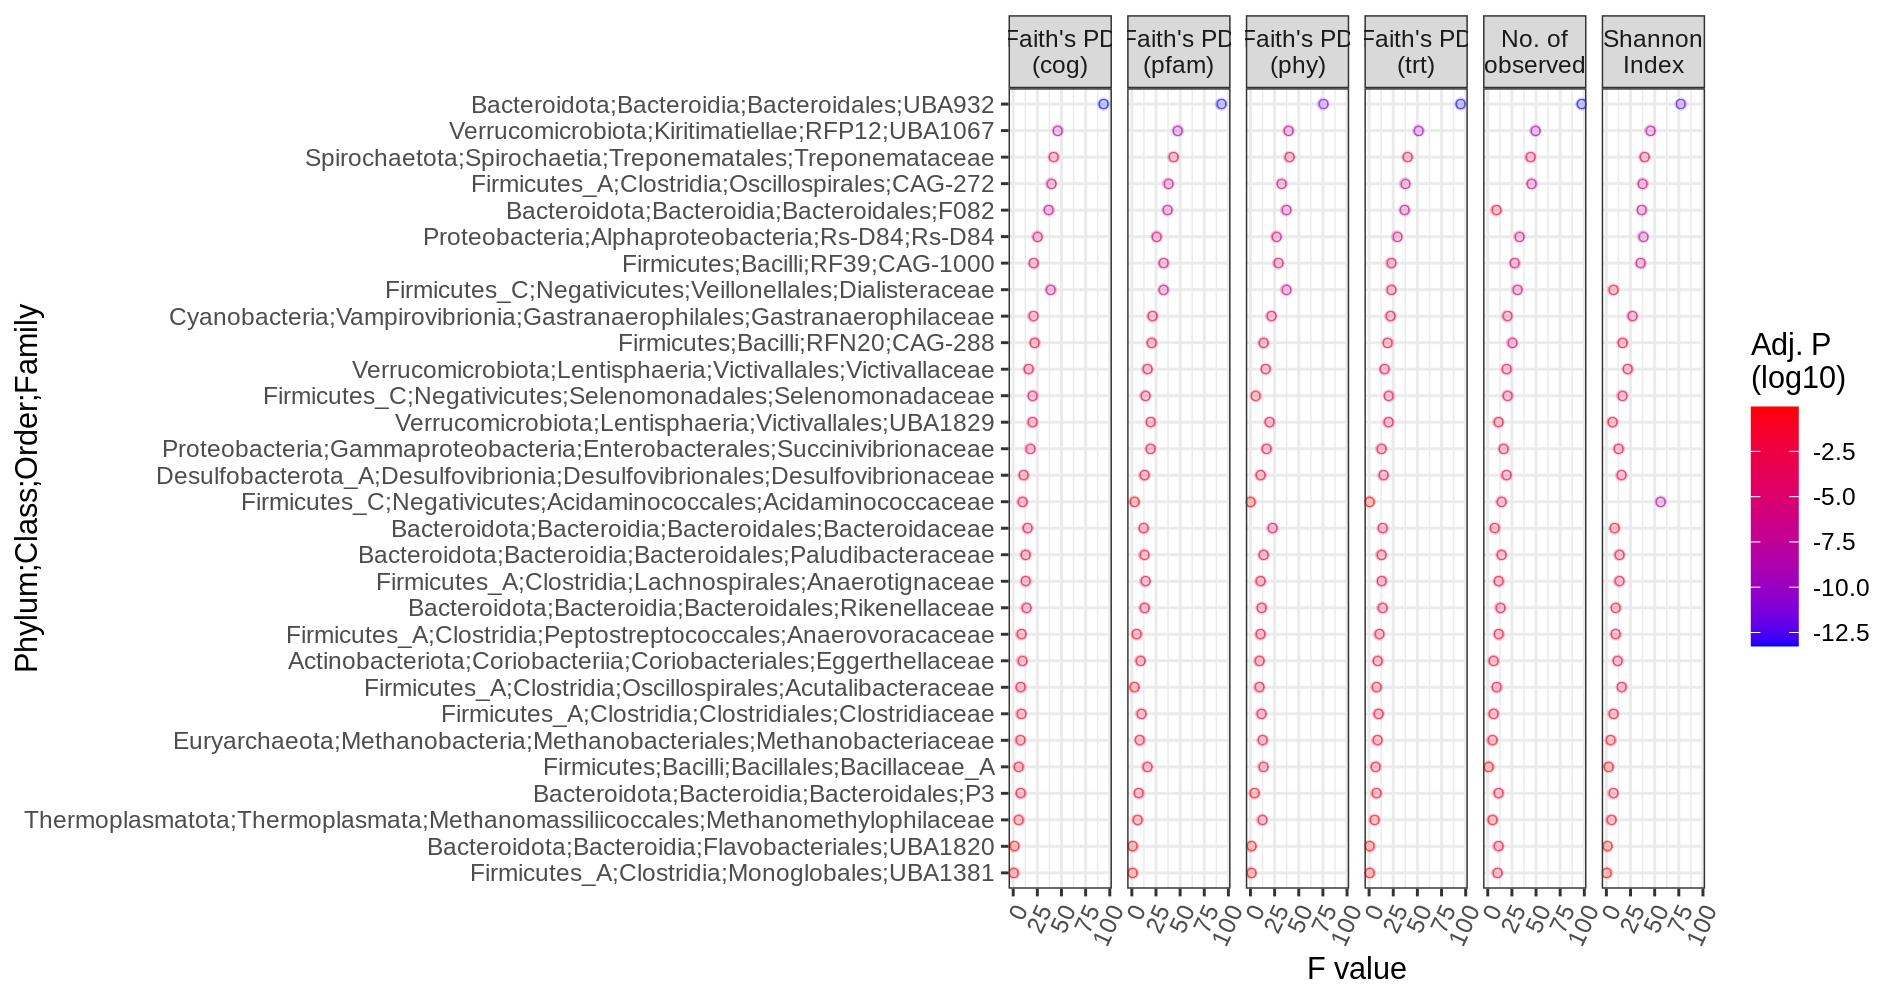

In [39]:
p = lmer_res %>%
    mutate.(any_sig = any(Padj < 0.01), .by=c(Clade)) %>%
    filter.(any_sig == TRUE) %>%
    mutate.(mean_F = mean(F_value), .by=c(Clade)) %>%
    mutate.(Clade = gsub('___', ';', Clade),
            Clade = gsub('^(Bacteria|Archaea);', '', Clade),
            Clade = Clade %>% reorder(mean_F)) %>%
    ggplot(aes(Clade, F_value, color=log10(Padj))) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.6, shape='O') +
    scale_color_continuous('Adj. P\n(log10)', low='blue', high='red') +
    labs(x='Phylum;Class;Order;Family', y='F value') +
    facet_grid(. ~ Metric) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1)
    ) +
    coord_flip() 

p.dims(9.5,5)
plot(p)

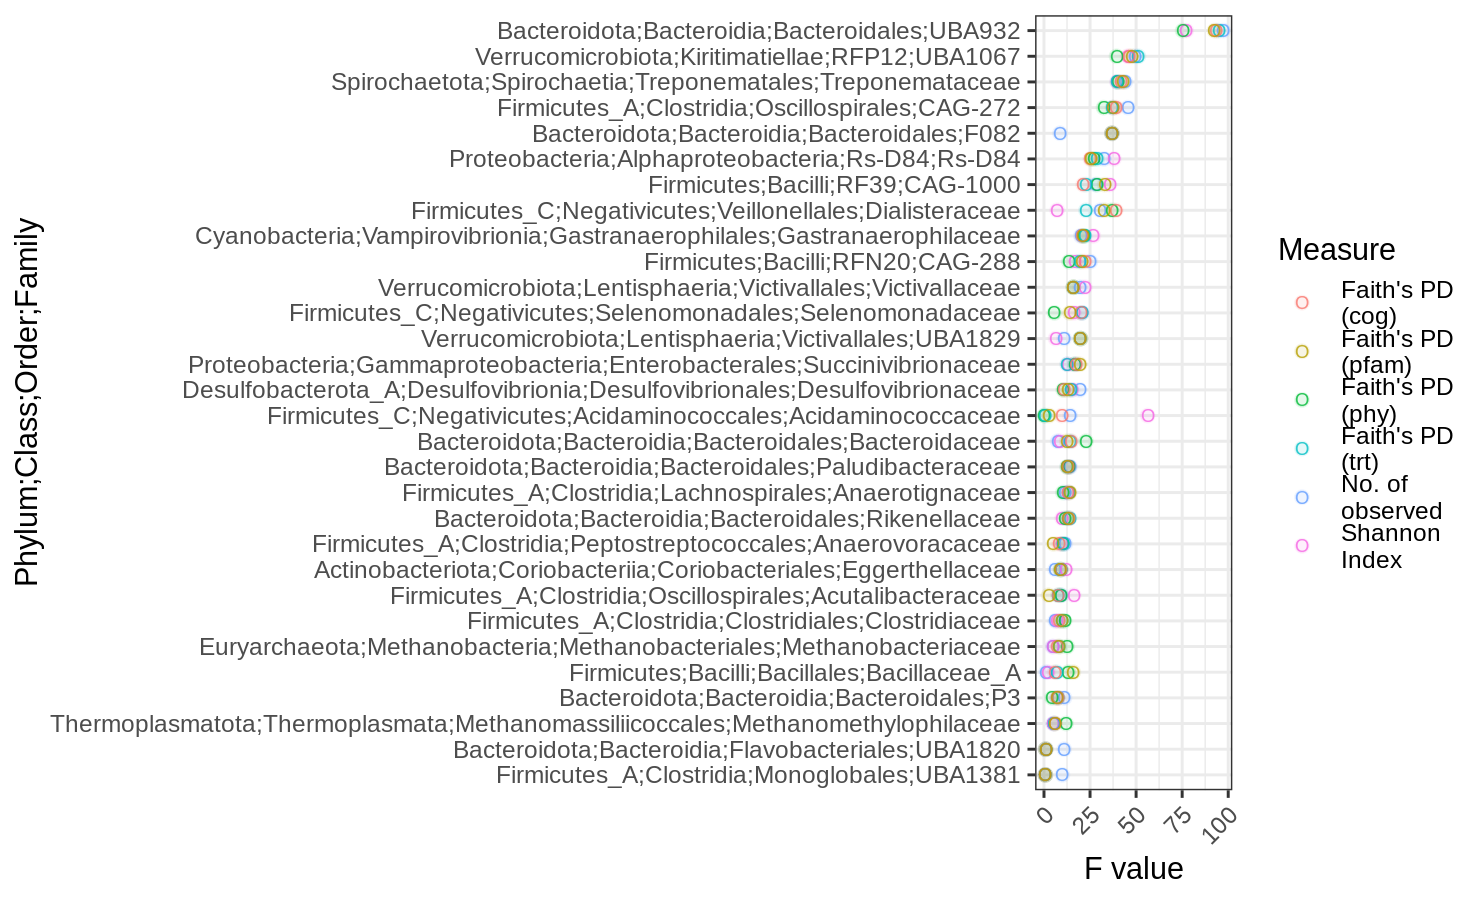

In [40]:
# plotting
p = lmer_res %>%
    mutate.(any_sig = any(Padj < 0.01), .by=c(Clade)) %>%
    filter.(any_sig == TRUE, Metric != 'nobs') %>%
    mutate.(mean_F = mean(F_value), .by=c(Clade)) %>%
    mutate.(Clade = gsub('___', ';', Clade),
              Clade = gsub('^(Bacteria|Archaea);', '', Clade),
              Clade = Clade %>% reorder(mean_F)) %>%
    ggplot(aes(Clade, F_value, color=Metric)) +
    geom_point(alpha=0.1, size=2) +
    geom_point(alpha=0.8, shape='O', size=2) +
    scale_color_discrete('Measure') +
    labs(x='Phylum;Class;Order;Family', y='F value') +
    theme_bw() +
    theme(axis.text.x = element_text(angle=45, hjust=1)) +
    coord_flip() 

p.dims(7.4,4.5)
plot(p)

# lmer: westernized + age + gender

In [41]:
# filtering
alpha_div_f = alpha_div %>%
    filter.(!is.na(gender),
            !is.na(age),
            gender != '',
            age != '') %>%
    mutate.(age = log2(age))

cat('--summary--\n')
alpha_div %>% unique_n('Samples', Sample)
alpha_div %>% unique_n('datasets', dataset_name)
cat('---\n')
alpha_div_f %>% unique_n('Samples', Sample)
alpha_div_f %>% unique_n('datasets', dataset_name)

--summary--
No. of unique Samples: 2943 
No. of unique datasets: 30 
---
No. of unique Samples: 1656 
No. of unique datasets: 16 


In [42]:
# pairwise combinations of clade & div_metric
clades = alpha_div %>% pull.(Clade) %>% unique
metrics = alpha_div %>% pull.(Metric) %>% unique
x = expand.grid(metrics, clades) 
colnames(x) = c('Metric', 'Clade')
x$iter = 1:nrow(x)

# calculation
Form = 'Metric_value ~ westernized + age + gender + (1 | dataset_name)'
doParallel::registerDoParallel(threads)
lmer_res = x %>% 
    group_split.(iter) %>%
    plyr::llply(calc_lm, alpha_div=alpha_div_f, Form=Form, .parallel=TRUE) %>%
    data.table::rbindlist(use.names=TRUE)

# formatting
colnames(lmer_res) = c('Sum_sq', 'Mean_sq', 'NumDF', 'DenDF', 
                       'F_value', 'P', 'Clade', 'Metric', 'Variable')
lmer_res = lmer_res %>%
    mutate.(P = P %>% as.Num,
            Padj = p.adjust(P, method='BH'),
            Metric = case_when.(Metric == 'nobs' ~ 'No. of\nobserved',
                                Metric == 'shannon' ~ 'Shannon\nIndex',
                                Metric == 'pd_cog' ~ 'Faith\'s PD\n(COG)',
                                Metric == 'pd_pfam' ~ 'Faith\'s PD\n(Pfam)',
                                Metric == 'pd_phy' ~ 'Faith\'s PD\n(Phylogeny)',
                                Metric == 'pd_trt' ~ 'Faith\'s PD\n(Trait)'))

# summary
lmer_res %>% unique_n('Clades', Clade)
lmer_res %>% unique_n('Metrics', Metric)
lmer_res

No. of unique Clades: 136 
No. of unique Metrics: 6 


Sum_sq,Mean_sq,NumDF,DenDF,F_value,P,Clade,Metric,Variable,Padj
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
155.6288,155.6288,1,27.40974,5.973828,2.122526e-02,Bacteria___Firmicutes_A___Clostridia___Oscillospirales___Acutalibacteraceae,No. of observed,westernized,0.1005378618
497.3414,497.3414,1,1193.75225,19.090499,1.354941e-05,Bacteria___Firmicutes_A___Clostridia___Oscillospirales___Acutalibacteraceae,No. of observed,age,0.0002640723
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
NA,NA,NA,NA,NA,NA,Bacteria___Firmicutes_A___Clostridia___Saccharofermentanales___Saccharofermentanaceae,Faith's PD (COG),westernized,NA
NA,NA,NA,NA,NA,NA,Bacteria___Firmicutes_A___Clostridia___Saccharofermentanales___Saccharofermentanaceae,Faith's PD (Pfam),westernized,NA


In [43]:
# Summary of P-values
lmer_res %>% pull.(P) %>% summary_x('P')
lmer_res %>% pull.(Padj) %>% summary_x('Padj')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,NA's,sd,sd_err_of_mean
P,3.371272e-48,0.0409539,0.2726084,0.3417807,0.6018908,1,199,75.074,28.375


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,NA's,sd,sd_err_of_mean
Padj,6.30765e-45,0.1633598,0.5438989,0.4931055,0.8021894,1,199,75.027,28.357


Warning message:
“Removed 199 rows containing missing values (geom_point).”


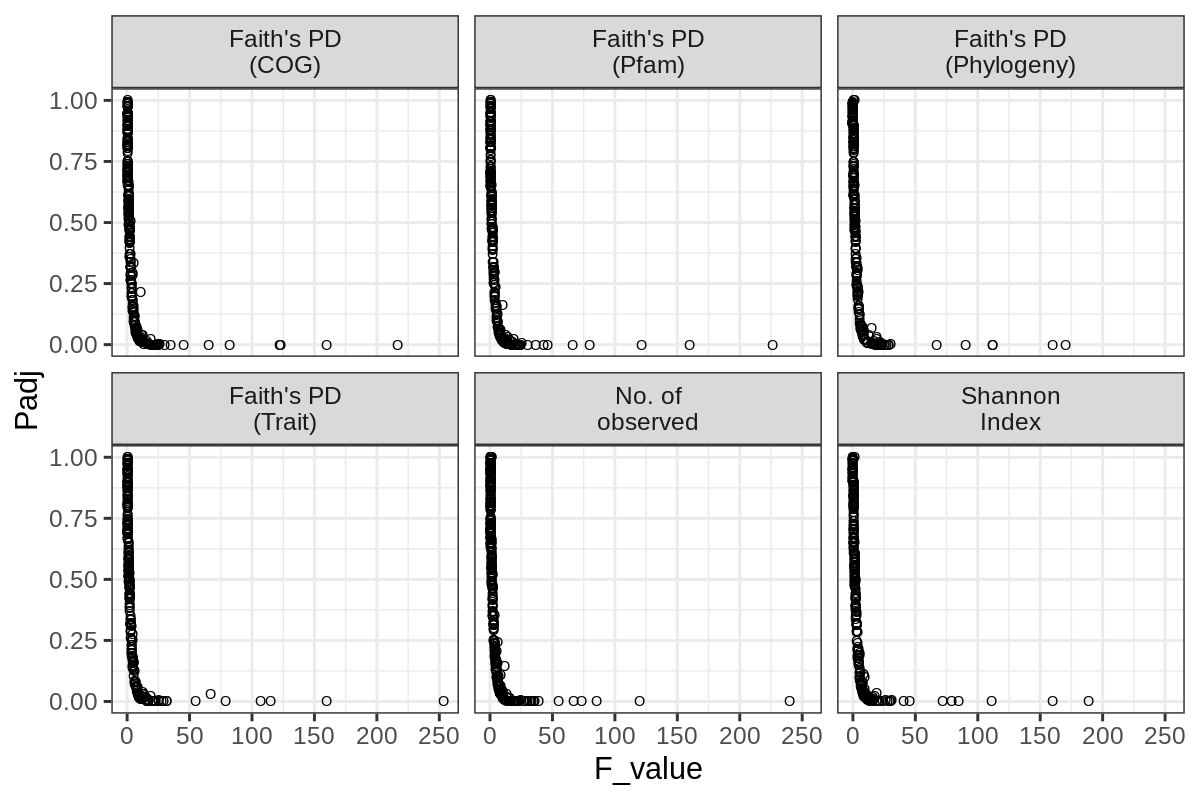

In [44]:
p = lmer_res %>%
    ggplot(aes(F_value, Padj)) +
    geom_point(shape='O') +
    facet_wrap(~ Metric) +
    theme_bw()
p.dims(6,4)
plot(p)

## Plotting

### Westernization

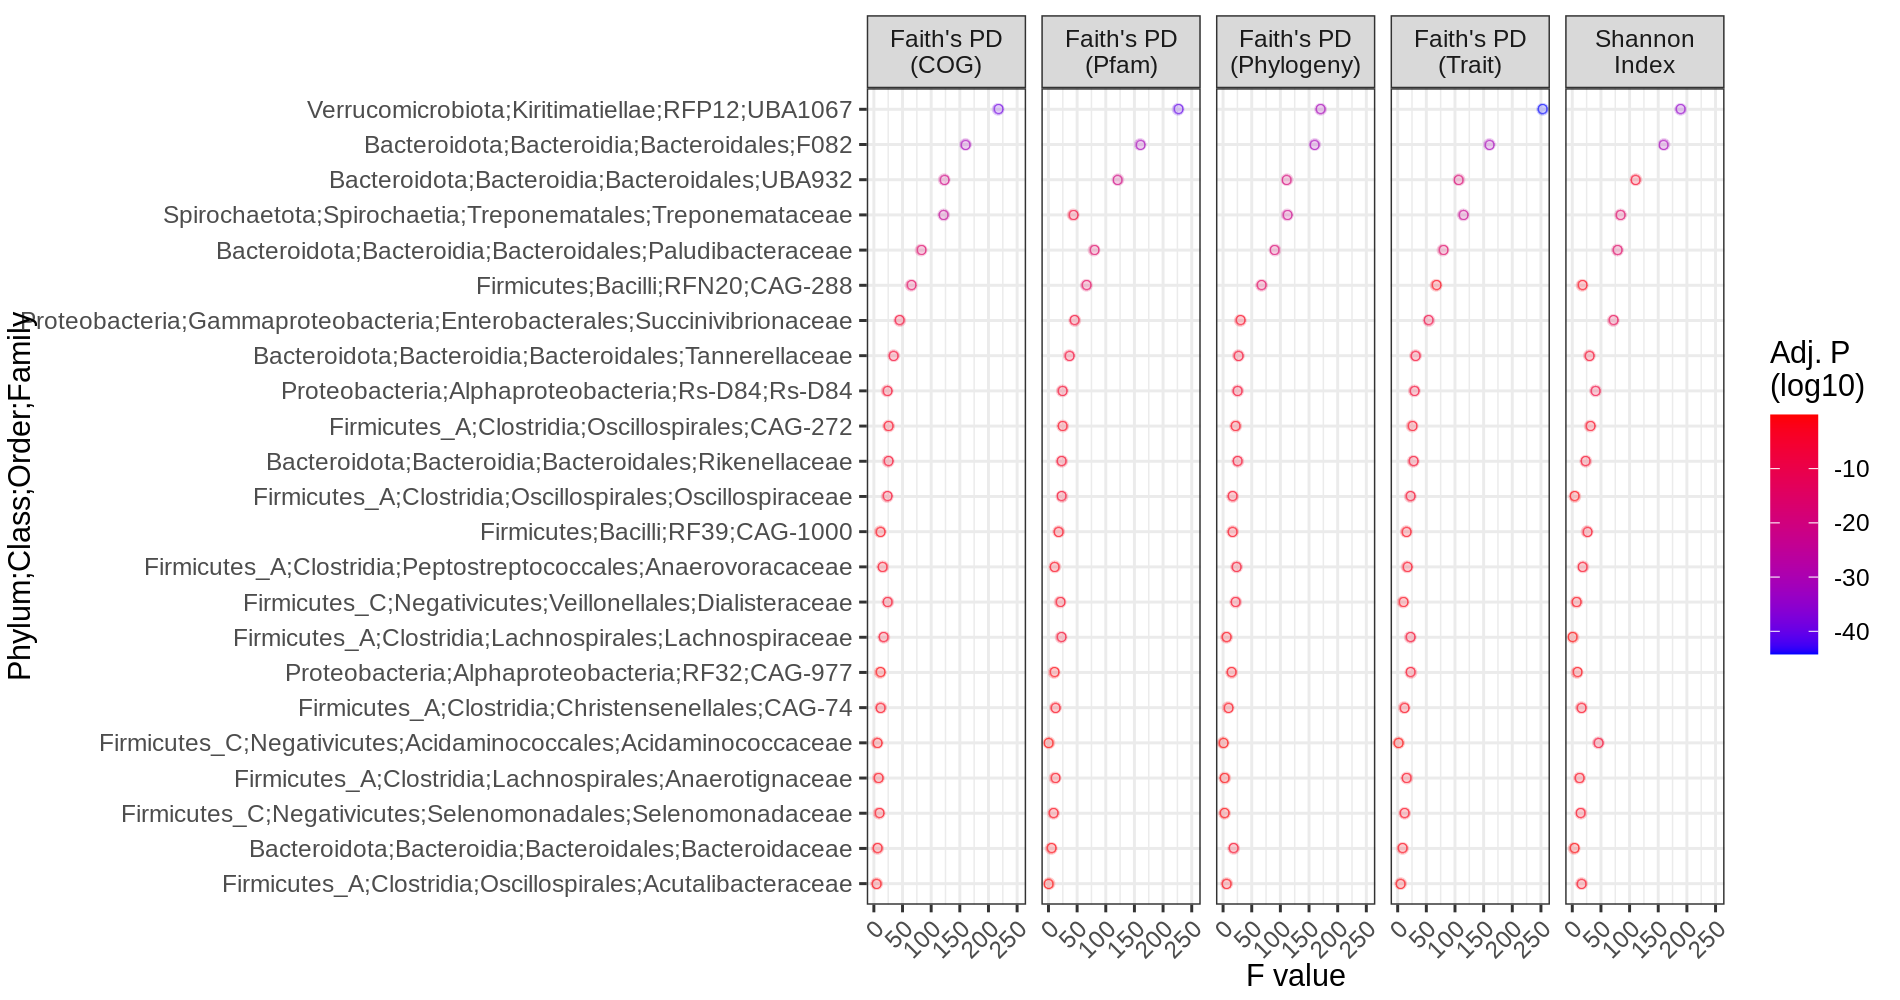

In [45]:
# westernization
p = lmer_res %>%
    filter.(Metric != 'No. of\nobserved') %>%
    filter.(Variable == 'westernized') %>%
    mutate.(sig = Padj < 0.01) %>%
    mutate.(any_sig = any(sig), 
            .by=c(Clade)) %>%
    filter.(any_sig == TRUE) %>%
    mutate.(mean_F = mean(F_value, na.rm=TRUE), .by=c(Clade)) %>%
    mutate.(Clade = gsub('___', ';', Clade),
            Clade = gsub('^(Bacteria|Archaea);', '', Clade),
            Clade = Clade %>% reorder(mean_F)) %>%
    ggplot(aes(Clade, F_value, color=log10(Padj))) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.6, shape='O') +
    scale_color_continuous('Adj. P\n(log10)', low='blue', high='red') +
    labs(x='Phylum;Class;Order;Family', y='F value') +
    facet_grid(. ~ Metric) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip() 

p.dims(9.5,5)
plot(p)

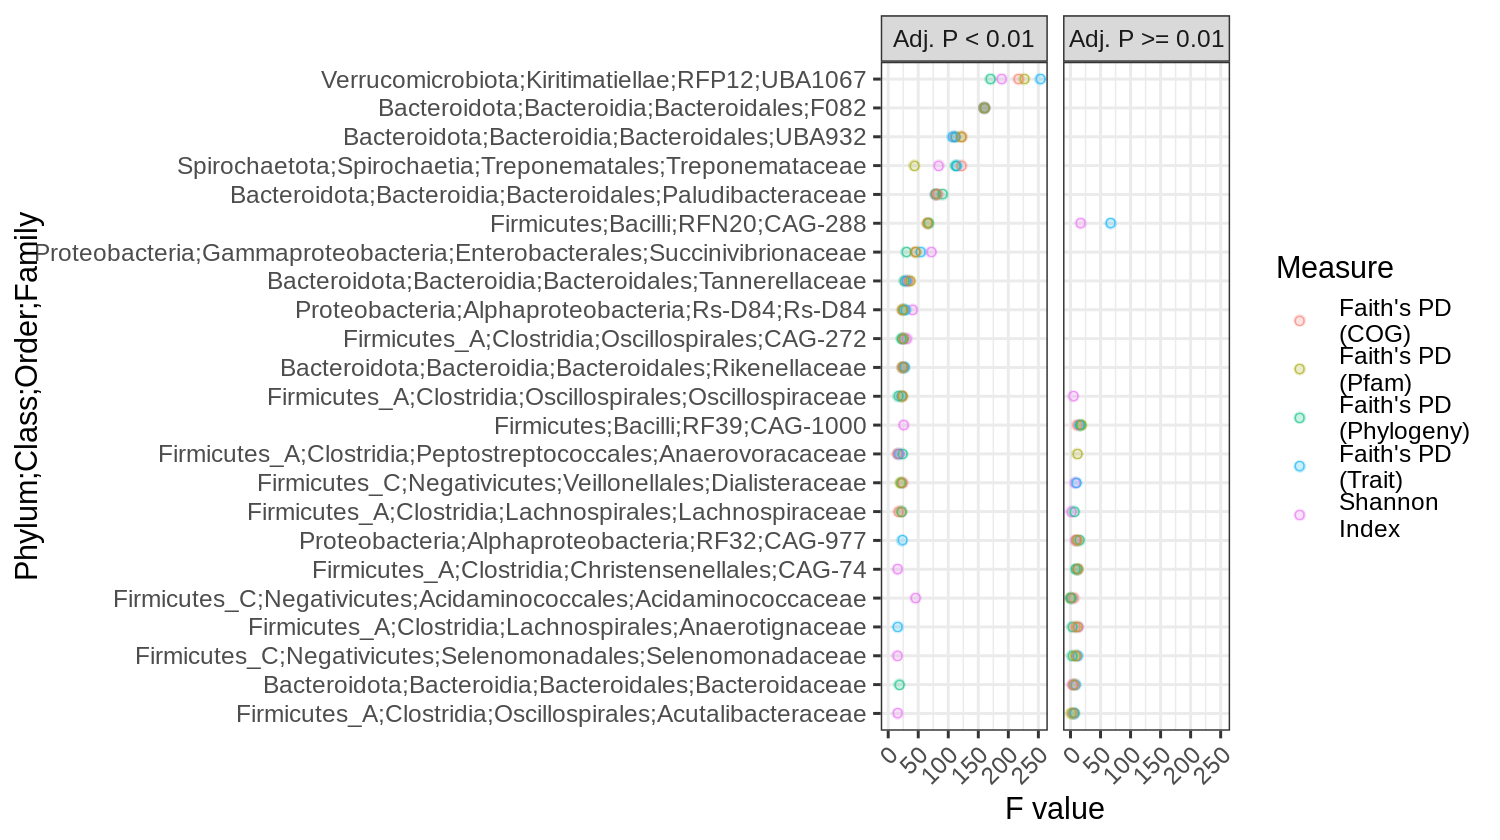

In [46]:
p = lmer_res %>%
    filter.(Metric != 'No. of\nobserved') %>%
    filter.(Variable == 'westernized') %>%
    mutate.(sig = ifelse(Padj < 0.01, 'Adj. P < 0.01', 'Adj. P >= 0.01')) %>%
    mutate.(any_sig = any(Padj < 0.01), 
            .by=c(Clade)) %>%
    filter.(any_sig == TRUE) %>%
    mutate.(mean_F = mean(F_value), .by=c(Clade)) %>%
    mutate.(Clade = gsub('___', ';', Clade),
            Clade = gsub('^(Bacteria|Archaea);', '', Clade),
            Clade = Clade %>% reorder(mean_F)) %>%
    ggplot(aes(Clade, F_value, color=Metric)) +
    geom_point(alpha=0.2, size=1.5) +
    geom_point(alpha=0.6, shape='O', size=1.5) +
    scale_color_discrete('Measure') +
    labs(x='Phylum;Class;Order;Family', y='F value') +
    facet_grid(. ~ sig) +
    theme_bw() +
    theme(axis.text.x = element_text(angle=45, hjust=1)) +
    coord_flip() 
p.dims(7.5,4.2)
plot(p)

In [47]:
# summary
lmer_res_s = lmer_res %>%
    filter.(Metric != 'No. of\nobserved') %>%
    filter.(Variable == 'westernized') %>%
    filter.(Padj < 0.01) %>%
    mutate.(Clade = gsub('__', ';', Clade)) %>%
    separate.(Clade, c('Domain', 'Phylum', 'Class', 'Order', 'Family'), sep=';')
lmer_res_s$Phylum %>% unique_n('Phyla')
lmer_res_s$Class %>% unique_n('Classes')
lmer_res_s$Order %>% unique_n('Order')

No. of unique Phyla: 7 
No. of unique Classes: 8 
No. of unique Order: 15 


### Gender

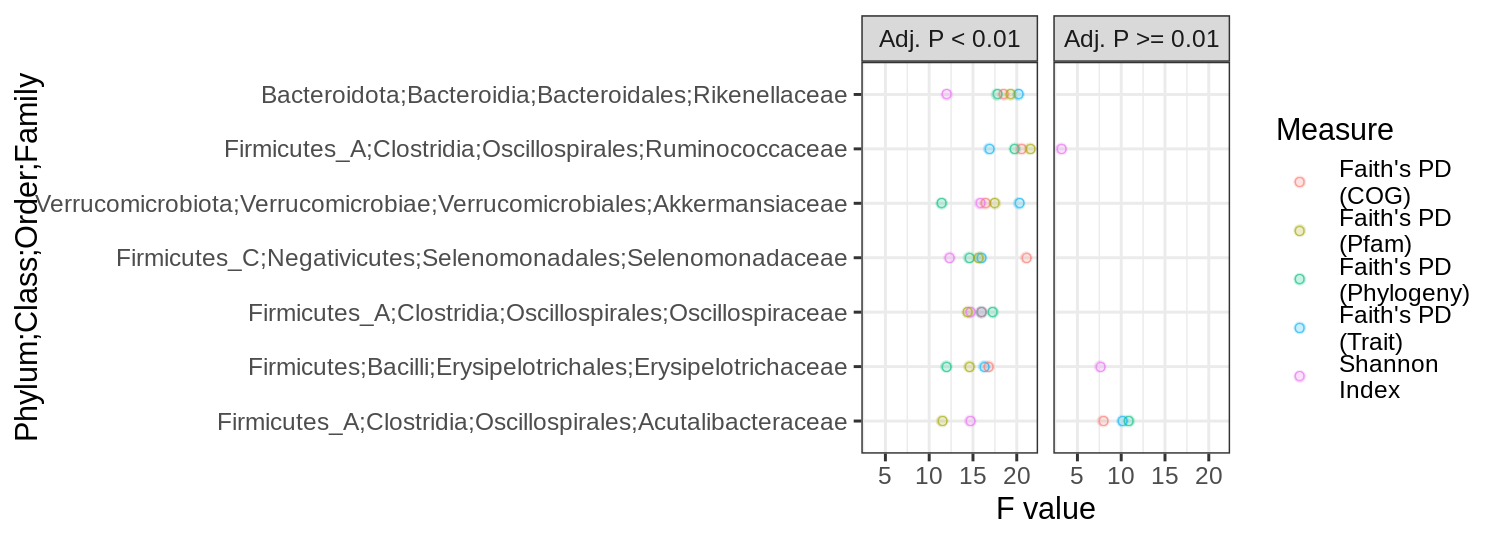

In [48]:
p = lmer_res %>%
    filter.(Metric != 'No. of\nobserved') %>%
    filter.(Variable == 'gender') %>%
    mutate.(sig = ifelse(Padj < 0.01, 'Adj. P < 0.01', 'Adj. P >= 0.01')) %>%
    mutate.(any_sig = any(Padj < 0.01), 
            .by=c(Clade)) %>%
    filter.(any_sig == TRUE) %>%
    mutate.(mean_F = mean(F_value), .by=c(Clade)) %>%
    mutate.(Clade = gsub('___', ';', Clade),
            Clade = gsub('^(Bacteria|Archaea);', '', Clade),
            Clade = Clade %>% reorder(mean_F)) %>%
    ggplot(aes(Clade, F_value, color=Metric)) +
    geom_point(alpha=0.2, size=1.5) +
    geom_point(alpha=0.6, shape='O', size=1.5) +
    scale_color_discrete('Measure') +
    labs(x='Phylum;Class;Order;Family', y='F value') +
    facet_grid(. ~ sig) +
    theme_bw() +
    coord_flip() 
p.dims(7.5,2.7)
plot(p)

In [49]:
# summary
lmer_res_s = lmer_res %>%
    filter.(Metric != 'No. of\nobserved') %>%
    filter.(Variable == 'gender') %>%
    filter.(Padj < 0.01) %>%
    mutate.(Clade = gsub('__', ';', Clade)) %>%
    separate.(Clade, c('Domain', 'Phylum', 'Class', 'Order', 'Family'), sep=';')
lmer_res_s$Phylum %>% unique_n('Phyla')
lmer_res_s$Class %>% unique_n('Classes')
lmer_res_s$Order %>% unique_n('Order')

No. of unique Phyla: 5 
No. of unique Classes: 5 
No. of unique Order: 5 


### Age

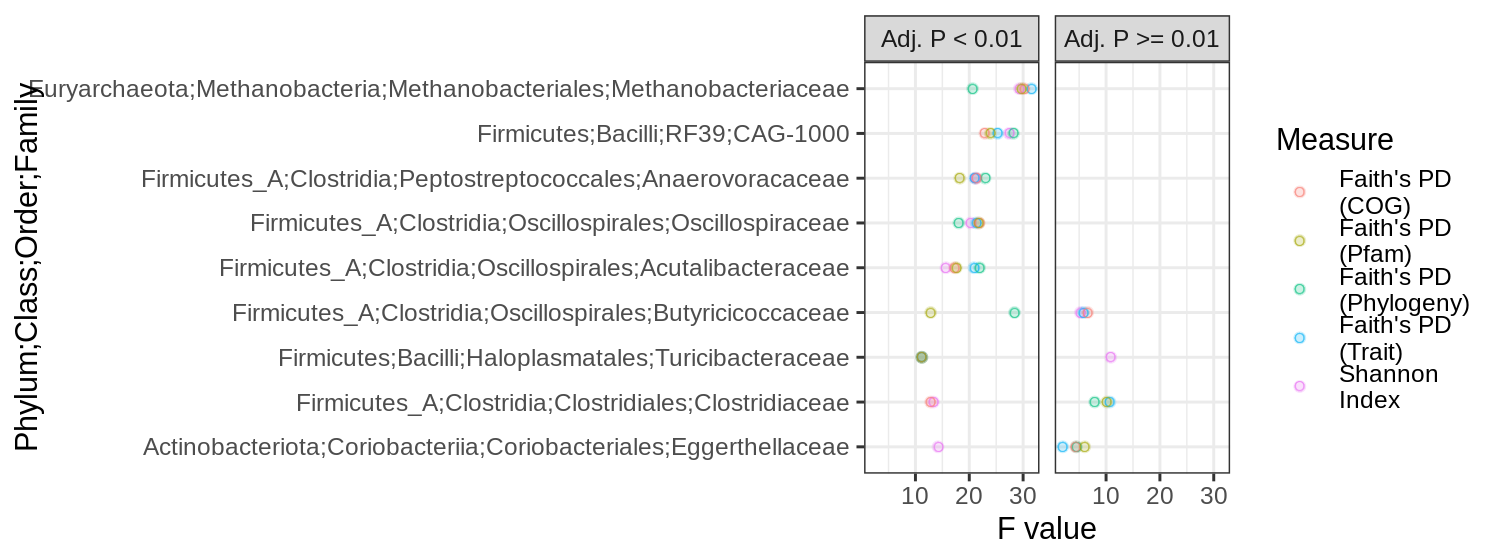

In [50]:
p = lmer_res %>%
    filter.(Metric != 'No. of\nobserved') %>%
    filter.(Variable == 'age') %>%
    mutate.(sig = ifelse(Padj < 0.01, 'Adj. P < 0.01', 'Adj. P >= 0.01')) %>%
    mutate.(any_sig = any(Padj < 0.01), 
            .by=c(Clade)) %>%
    filter.(any_sig == TRUE) %>%
    mutate.(mean_F = mean(F_value), .by=c(Clade)) %>%
    mutate.(Clade = gsub('___', ';', Clade),
            Clade = gsub('^(Bacteria|Archaea);', '', Clade),
            Clade = Clade %>% reorder(mean_F)) %>%
    ggplot(aes(Clade, F_value, color=Metric)) +
    geom_point(alpha=0.2, size=1.5) +
    geom_point(alpha=0.6, shape='O', size=1.5) +
    scale_color_discrete('Measure') +
    labs(x='Phylum;Class;Order;Family', y='F value') +
    facet_grid(. ~ sig) +
    theme_bw() +
    coord_flip() 
p.dims(7.5,2.8)
plot(p)

In [51]:
# summary
lmer_res_s = lmer_res %>%
    filter.(Metric != 'No. of\nobserved') %>%
    filter.(Variable == 'age') %>%
    filter.(Padj < 0.01) %>%
    mutate.(Clade = gsub('__', ';', Clade)) %>%
    separate.(Clade, c('Domain', 'Phylum', 'Class', 'Order', 'Family'), sep=';')
lmer_res_s$Phylum %>% unique_n('Phyla')
lmer_res_s$Class %>% unique_n('Classes')
lmer_res_s$Order %>% unique_n('Order')

No. of unique Phyla: 4 
No. of unique Classes: 4 
No. of unique Order: 7 


# lmer: westernized + age + gender + disease

In [52]:
# filtering
alpha_div_f = alpha_div %>%
    filter.(!is.na(gender),
            !is.na(age),
            !is.na(disease_status),
            gender != '',
            age != '',
            disease_status != '') %>%
    mutate.(age = log2(age))

cat('-- stats --\n')
alpha_div %>% unique_n('Samples', Sample)
alpha_div %>% unique_n('datasets', dataset_name)
cat('---\n')
alpha_div_f %>% unique_n('Samples', Sample)
alpha_div_f %>% unique_n('datasets', dataset_name)

-- stats --
No. of unique Samples: 2943 
No. of unique datasets: 30 
---
No. of unique Samples: 1656 
No. of unique datasets: 16 


In [53]:
# pairwise combinations of clade & div_metric
clades = alpha_div %>% pull.(Clade) %>% unique
metrics = alpha_div %>% pull.(Metric) %>% unique
x = expand.grid(metrics, clades) 
colnames(x) = c('Metric', 'Clade')
x$iter = 1:nrow(x)

# calculation
Form = 'Metric_value ~ westernized + age + gender + disease_status + (1 | dataset_name)'
doParallel::registerDoParallel(threads)
lmer_res = x %>% 
    group_split.(iter) %>%
    plyr::llply(calc_lm, alpha_div=alpha_div_f, Form=Form, .parallel=TRUE) %>%
    rbindlist(use.names=TRUE)

# formatting
colnames(lmer_res) = c('Sum_sq', 'Mean_sq', 'NumDF', 'DenDF', 
                       'F_value', 'P', 'Clade', 'Metric', 'Variable')
lmer_res = lmer_res %>%
    mutate.(P = P %>% as.Num,
            Padj = p.adjust(P, method='BH'))

# summary
lmer_res %>% unique_n('Clades', Clade)
lmer_res %>% unique_n('Metrics', Metric)
lmer_res

No. of unique Clades: 136 
No. of unique Metrics: 6 


Sum_sq,Mean_sq,NumDF,DenDF,F_value,P,Clade,Metric,Variable,Padj
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
168.6125,168.6125,1,24.50248,6.48117,0.0175898773,Bacteria___Firmicutes_A___Clostridia___Oscillospirales___Acutalibacteraceae,nobs,westernized,0.0912926027
473.5523,473.5523,1,1204.37239,18.20252,0.0000214181,Bacteria___Firmicutes_A___Clostridia___Oscillospirales___Acutalibacteraceae,nobs,age,0.0003650191
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
NA,NA,NA,NA,NA,NA,Bacteria___Firmicutes_A___Clostridia___Saccharofermentanales___Saccharofermentanaceae,pd_cog,westernized,NA
NA,NA,NA,NA,NA,NA,Bacteria___Firmicutes_A___Clostridia___Saccharofermentanales___Saccharofermentanaceae,pd_pfam,westernized,NA


In [54]:
# formatting
lmer_res = lmer_res %>%
    mutate.(Metric = case_when.(Metric == 'nobs' ~ 'No. of obs.',
                                Metric == 'shannon' ~ 'Shannon',
                                Metric == 'pd_cog' ~ 'Faith\'s PD (COG)',
                                Metric == 'pd_pfam' ~ 'Faith\'s PD (Pfam)',
                                Metric == 'pd_phy' ~ 'Faith\'s PD (Phylogeny)',
                                Metric == 'pd_trt' ~ 'Faith\'s PD (Trait)')) 
lmer_res$Metric %>% table

.
      Faith's PD (COG)      Faith's PD (Pfam) Faith's PD (Phylogeny) 
                   427                    427                    427 
    Faith's PD (Trait)            No. of obs.                Shannon 
                   427                    490                    427 

## Plotting

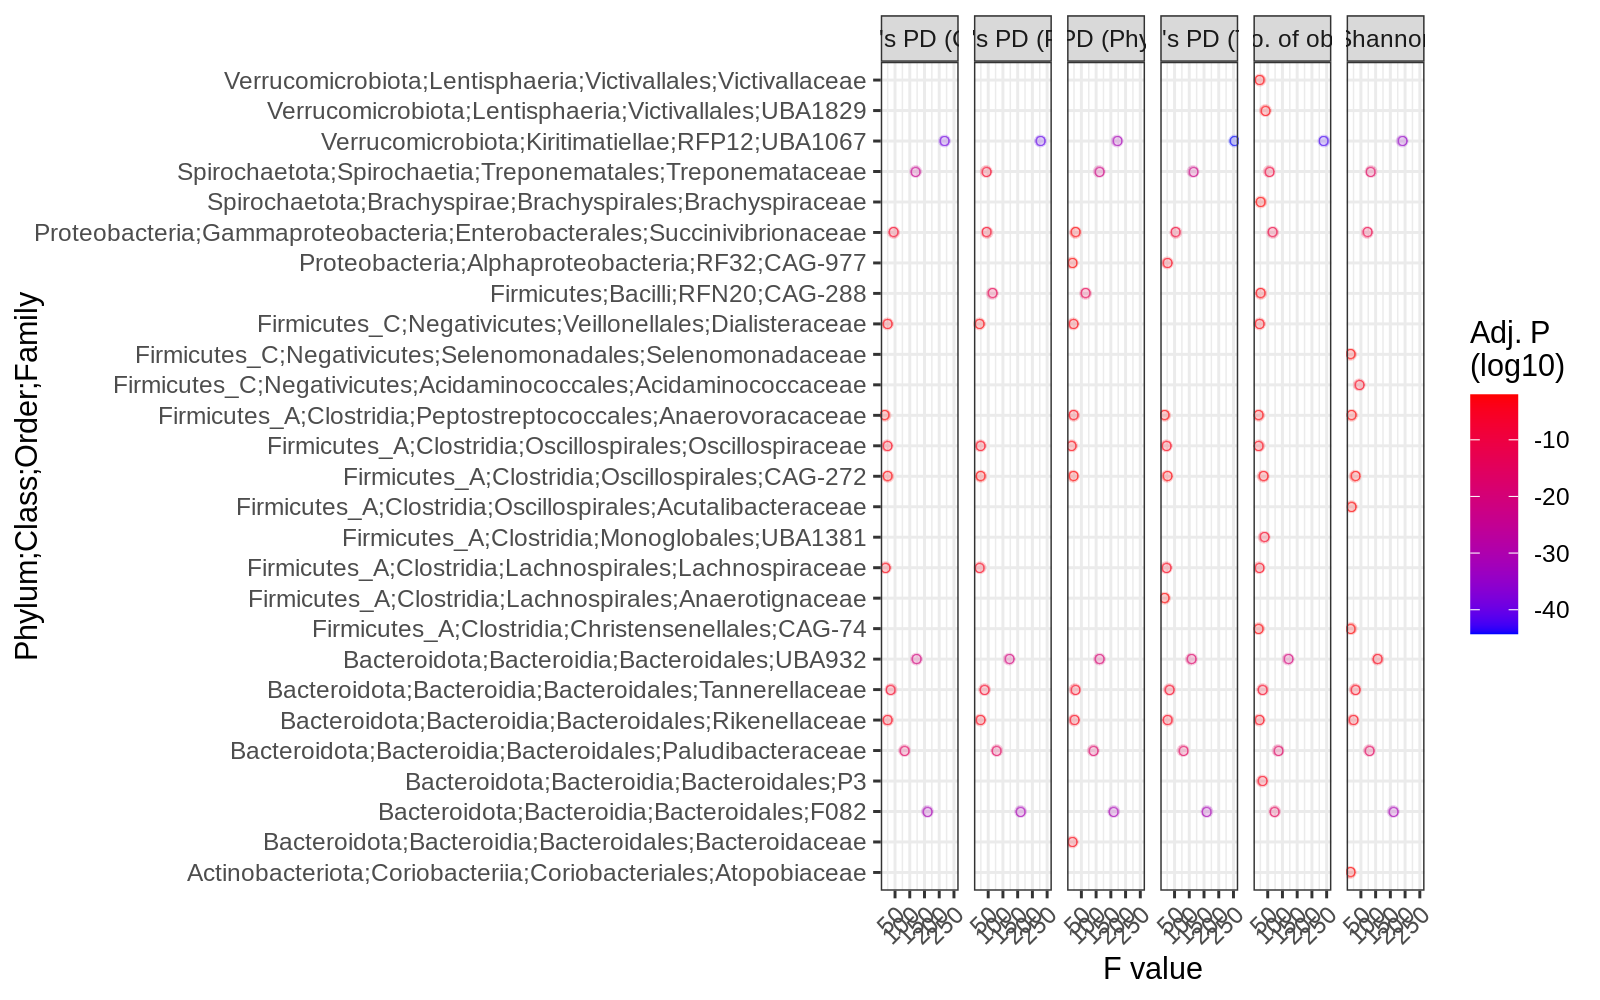

In [55]:
# westernization
p = lmer_res %>%
    filter.(Variable == 'westernized') %>%
    filter.(Padj < 0.01) %>%
    mutate.(mean_F = mean(F_value, na.rm=TRUE), by=list(Clade)) %>%
    mutate.(Clade = gsub('___', ';', Clade),
            Clade = gsub('^(Bacteria|Archaea);', '', Clade),
            Clade = Clade %>% reorder(mean_F)) %>%
    ggplot(aes(Clade, F_value, color=log10(Padj))) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.6, shape='O') +
    scale_color_continuous('Adj. P\n(log10)', low='blue', high='red') +
    labs(x='Phylum;Class;Order;Family', y='F value') +
    facet_grid(. ~ Metric) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip() 

p.dims(8,5)
plot(p)

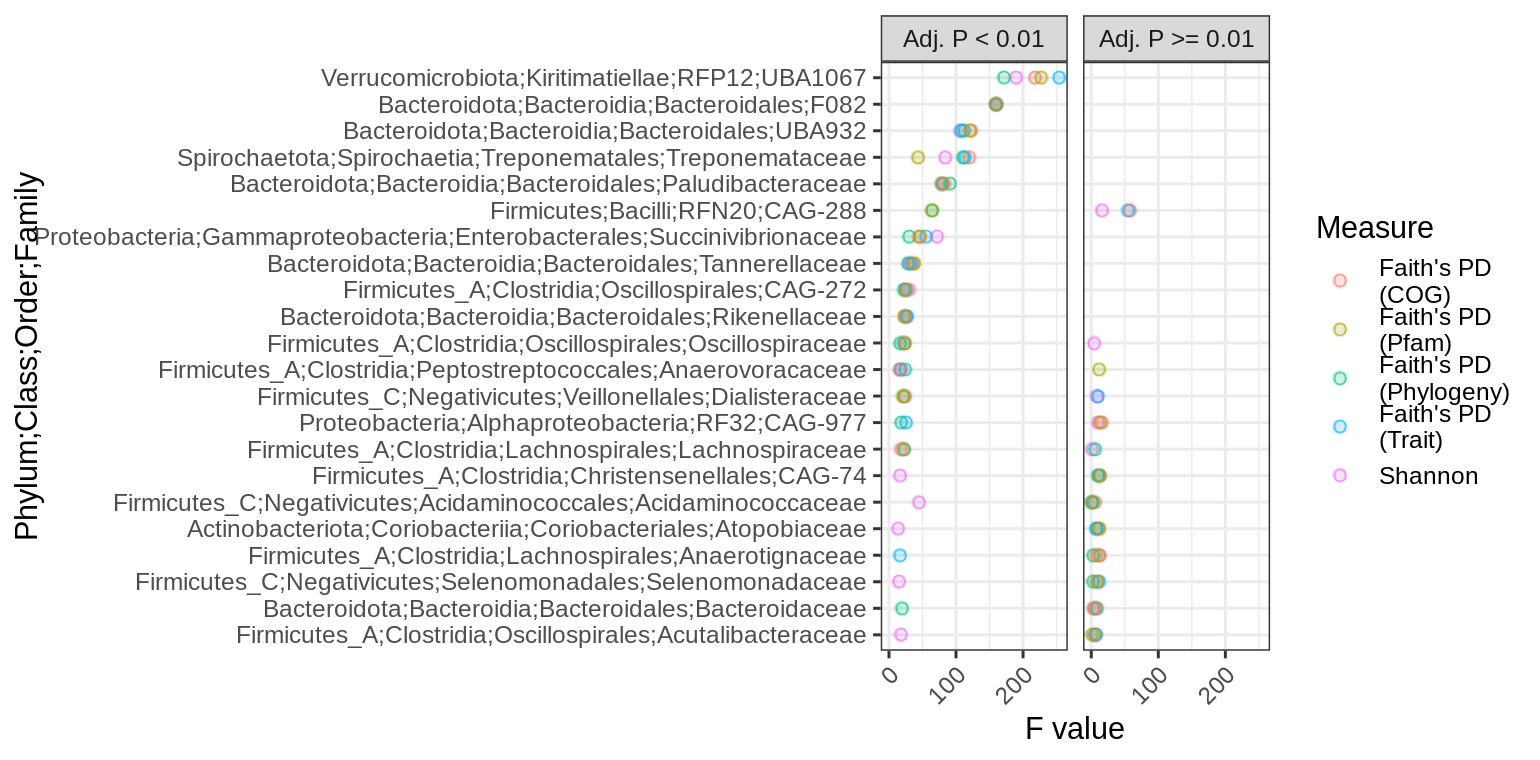

In [56]:
p = lmer_res %>%
    filter.(Variable == 'westernized') %>%
    filter.(Metric != 'No. of obs.') %>%
    mutate.(sig = ifelse(Padj < 0.01, 'Adj. P < 0.01', 'Adj. P >= 0.01')) %>%
    mutate.(any_sig = any(Padj < 0.01), 
            .by=c(Clade)) %>%
    filter.(any_sig == TRUE) %>%
    mutate.(mean_F = mean(F_value), .by=c(Clade)) %>%
    mutate.(Metric = gsub(' \\(', '\n(', Metric),
            Clade = gsub('___', ';', Clade),
            Clade = gsub('^(Bacteria|Archaea);', '', Clade),
            Clade = Clade %>% reorder(mean_F)) %>%
    ggplot(aes(Clade, F_value, color=Metric)) +
    geom_point(size=2, alpha=0.2) +
    geom_point(size=2, alpha=0.6, shape='O') +
    scale_color_discrete('Measure') +
    facet_grid(. ~ sig) +
    labs(x='Phylum;Class;Order;Family', y='F value') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip() 
p.dims(7.7,3.8)
plot(p)

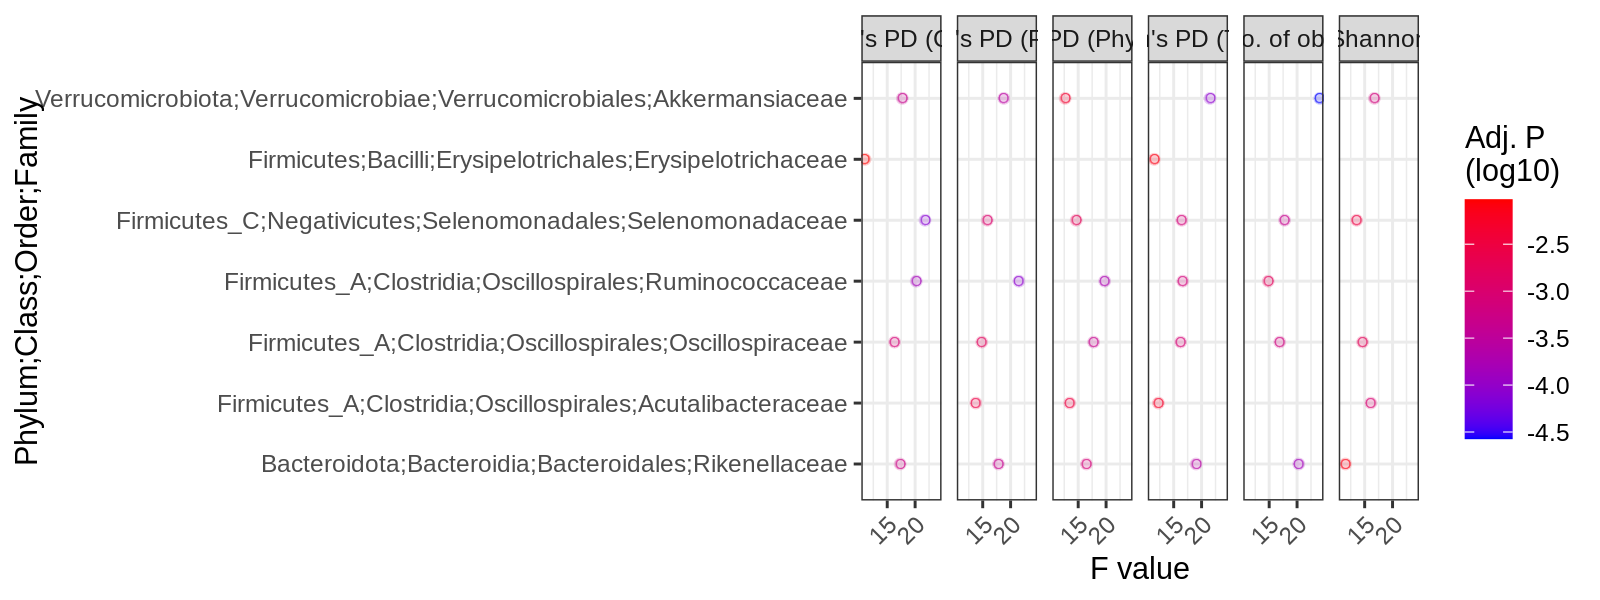

In [57]:
# gender
p = lmer_res %>%
    filter.(Variable == 'gender') %>%
    filter.(Padj < 0.01) %>%
    mutate.(mean_F = mean(F_value, na.rm=TRUE), by=list(Clade)) %>%
    mutate.(Clade = gsub('___', ';', Clade),
              Clade = gsub('^(Bacteria|Archaea);', '', Clade),
              Clade = Clade %>% reorder(mean_F)) %>%
    ggplot(aes(Clade, F_value, color=log10(Padj))) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.6, shape='O') +
    scale_color_continuous('Adj. P\n(log10)', low='blue', high='red') +
    labs(x='Phylum;Class;Order;Family', y='F value') +
    facet_grid(. ~ Metric) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip() 
p.dims(8,3)
plot(p)

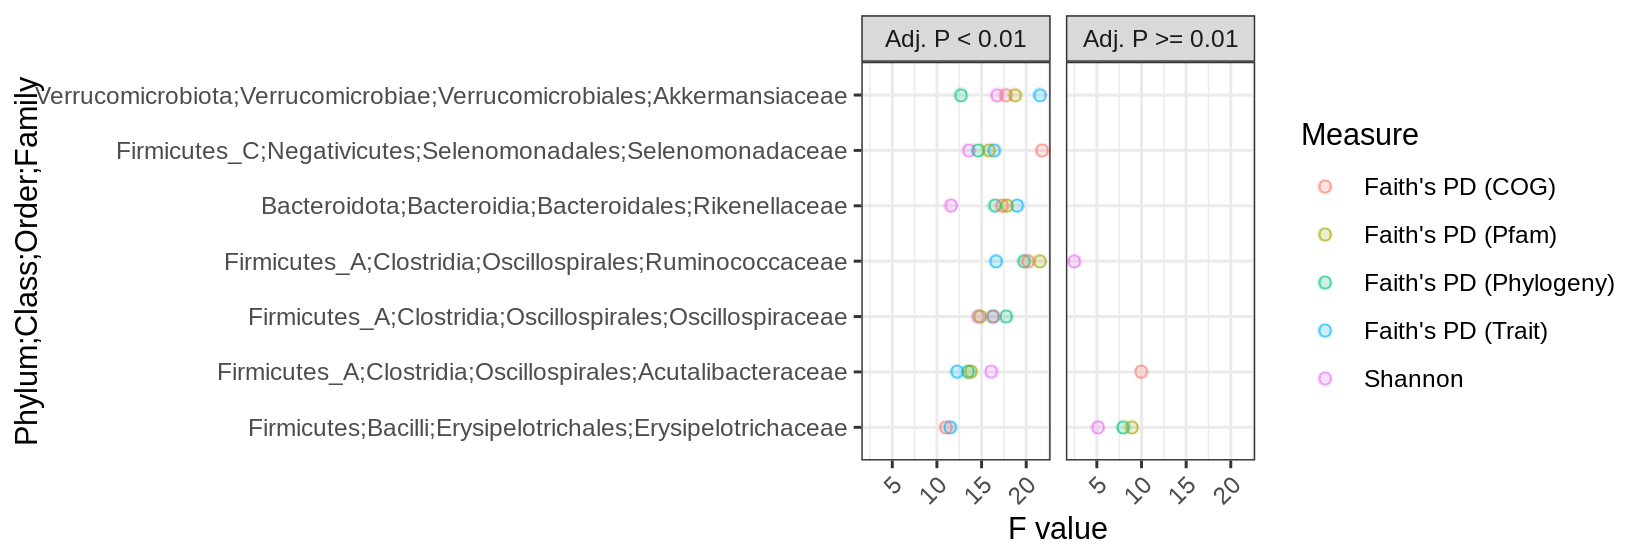

In [58]:
p = lmer_res %>%
    filter.(Variable == 'gender') %>%
    filter.(Metric != 'No. of obs.') %>%
    mutate.(sig = ifelse(Padj < 0.01, 'Adj. P < 0.01', 'Adj. P >= 0.01')) %>%
    mutate.(any_sig = any(Padj < 0.01), 
            .by=c(Clade)) %>%
    filter.(any_sig == TRUE) %>%
    mutate.(mean_F = mean(F_value), .by=c(Clade)) %>%
    mutate.(Clade = gsub('___', ';', Clade),
            Clade = gsub('^(Bacteria|Archaea);', '', Clade),
            Clade = Clade %>% reorder(mean_F)) %>%
    ggplot(aes(Clade, F_value, color=Metric)) +
    geom_point(size=2, alpha=0.2) +
    geom_point(size=2, alpha=0.6, shape='O') +
    scale_color_discrete('Measure') +
    facet_grid(. ~ sig) +
    labs(x='Phylum;Class;Order;Family', y='F value') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip() 
p.dims(8.2,2.8)
plot(p)

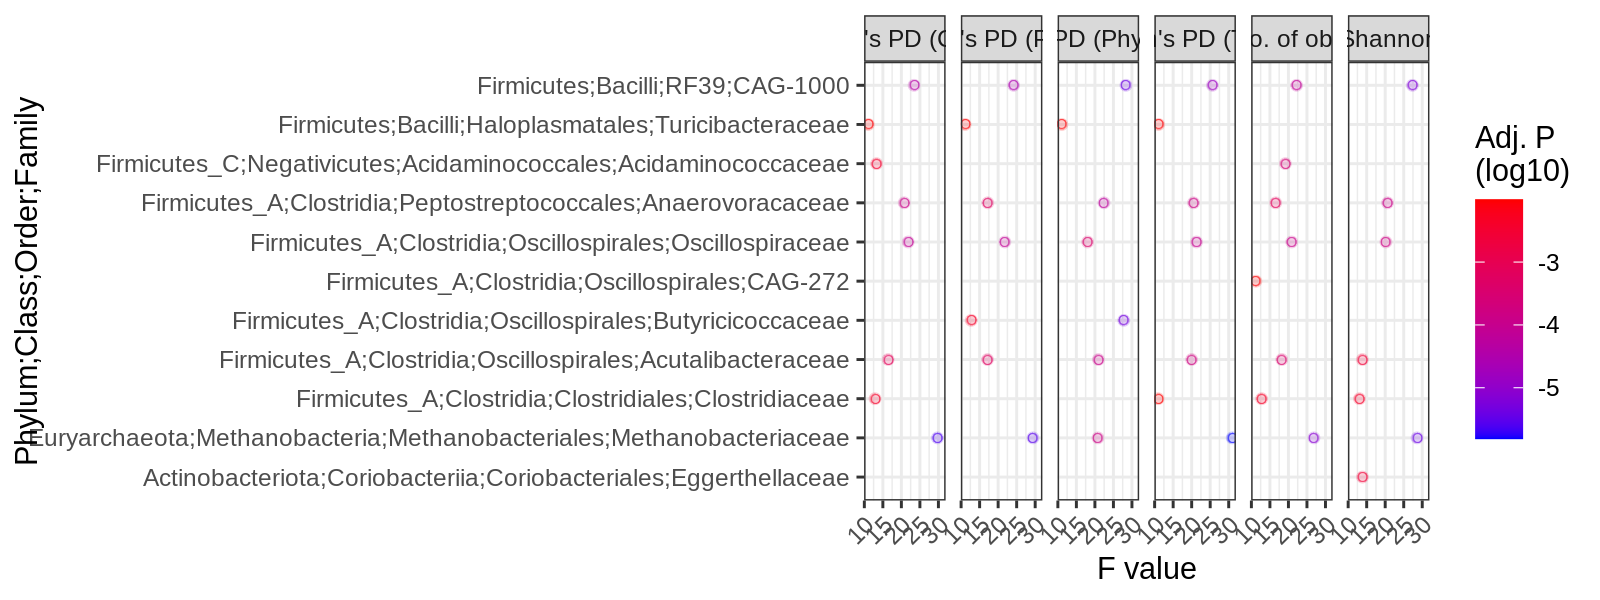

In [59]:
# age
p = lmer_res %>%
    filter.(Variable == 'age') %>%
    filter.(Padj < 0.01) %>%
    mutate.(mean_F = mean(F_value, na.rm=TRUE), by=list(Clade)) %>%
    mutate.(Clade = gsub('___', ';', Clade),
              Clade = gsub('^(Bacteria|Archaea);', '', Clade),
              Clade = Clade %>% reorder(mean_F)) %>%
    ggplot(aes(Clade, F_value, color=log10(Padj))) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.6, shape='O') +
    scale_color_continuous('Adj. P\n(log10)', low='blue', high='red') +
    labs(x='Phylum;Class;Order;Family', y='F value') +
    facet_grid(. ~ Metric) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip() 
p.dims(8,3)
plot(p)

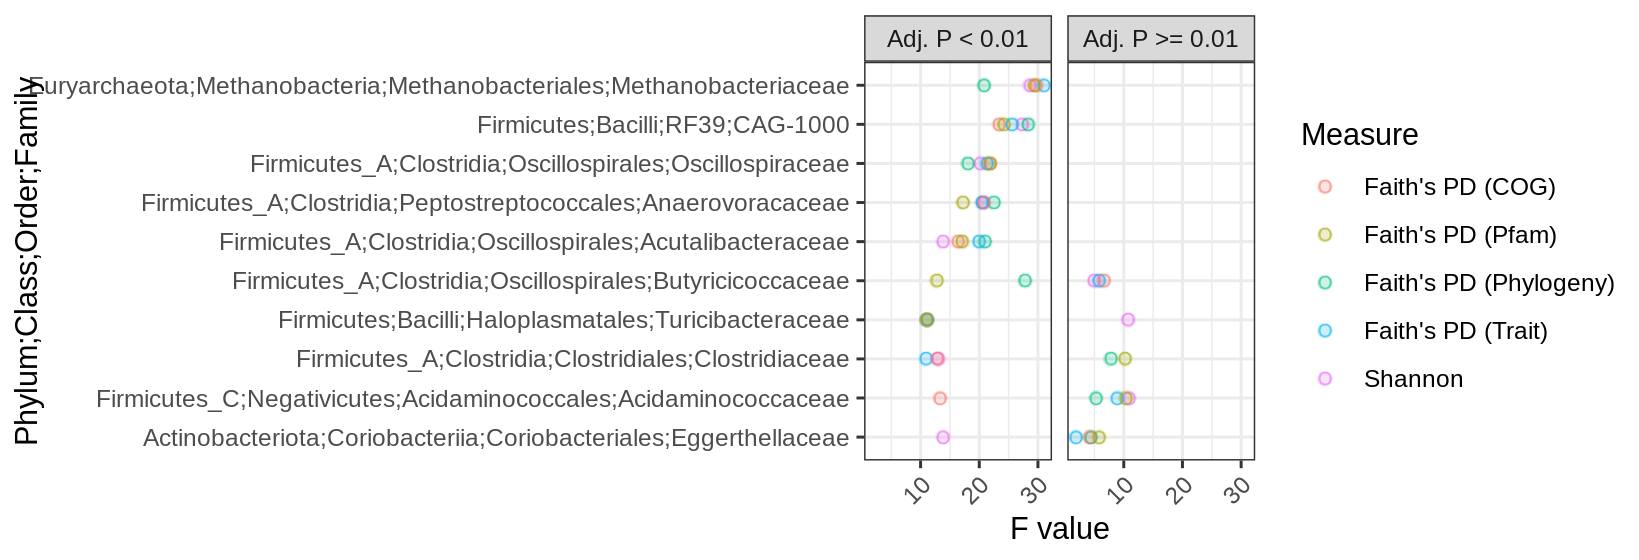

In [60]:
# plotting for age
p = lmer_res %>%
    filter.(Variable == 'age') %>%
    filter.(Metric != 'No. of obs.') %>%
    mutate.(sig = ifelse(Padj < 0.01, 'Adj. P < 0.01', 'Adj. P >= 0.01')) %>%
    mutate.(any_sig = any(Padj < 0.01), 
            .by=c(Clade)) %>%
    filter.(any_sig == TRUE) %>%
    mutate.(mean_F = mean(F_value), .by=c(Clade)) %>%
    mutate.(Clade = gsub('___', ';', Clade),
            Clade = gsub('^(Bacteria|Archaea);', '', Clade),
            Clade = Clade %>% reorder(mean_F)) %>%
    ggplot(aes(Clade, F_value, color=Metric)) +
    geom_point(size=2, alpha=0.2) +
    geom_point(size=2, alpha=0.6, shape='O') +
    scale_color_discrete('Measure') +
    facet_grid(. ~ sig) +
    labs(x='Phylum;Class;Order;Family', y='F value') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip() 
p.dims(8.2,2.8)
plot(p)

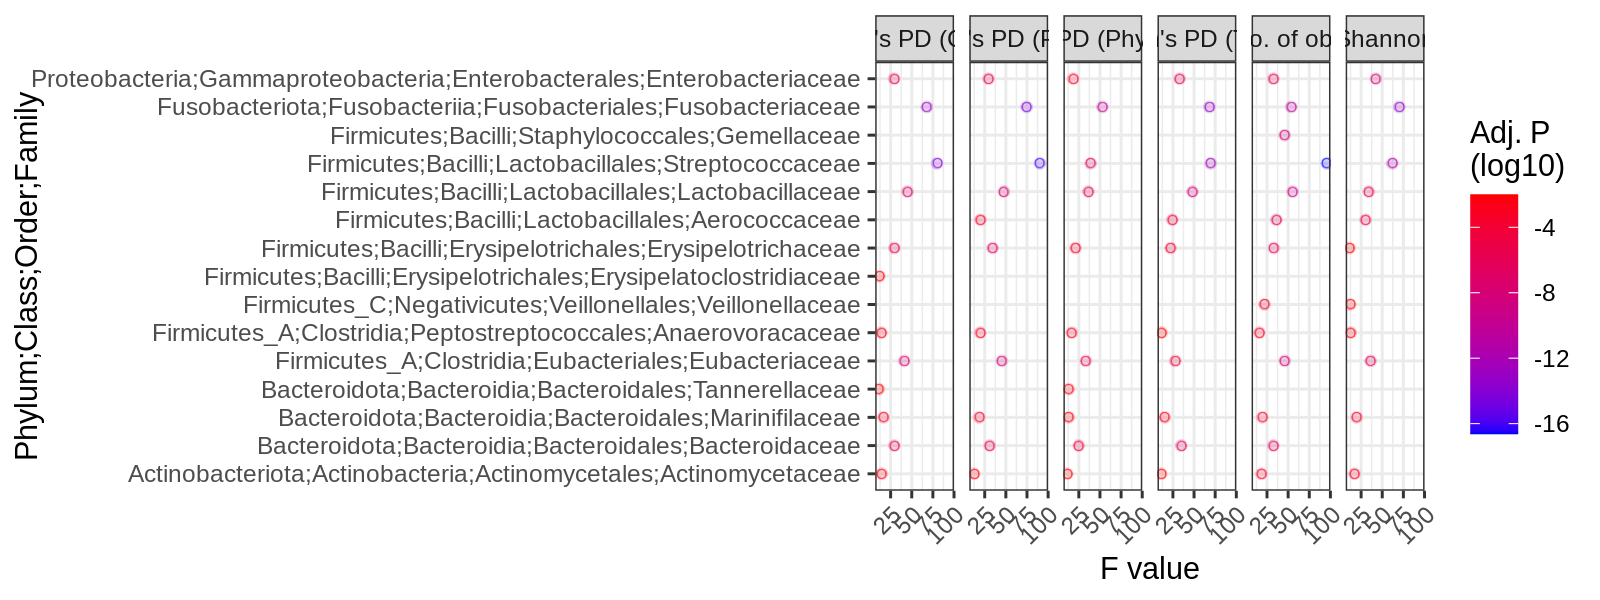

In [61]:
# disease status
p = lmer_res %>%
    filter.(Variable == 'disease_status') %>%
    filter.(Padj < 0.01) %>%
    mutate.(mean_F = mean(F_value, na.rm=TRUE), by=list(Clade)) %>%
    mutate.(Clade = gsub('___', ';', Clade),
              Clade = gsub('^(Bacteria|Archaea);', '', Clade),
              Clade = Clade %>% reorder(mean_F)) %>%
    ggplot(aes(Clade, F_value, color=log10(Padj))) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.6, shape='O') +
    scale_color_continuous('Adj. P\n(log10)', low='blue', high='red') +
    labs(x='Phylum;Class;Order;Family', y='F value') +
    facet_grid(. ~ Metric) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip() 
p.dims(8,3)
plot(p)

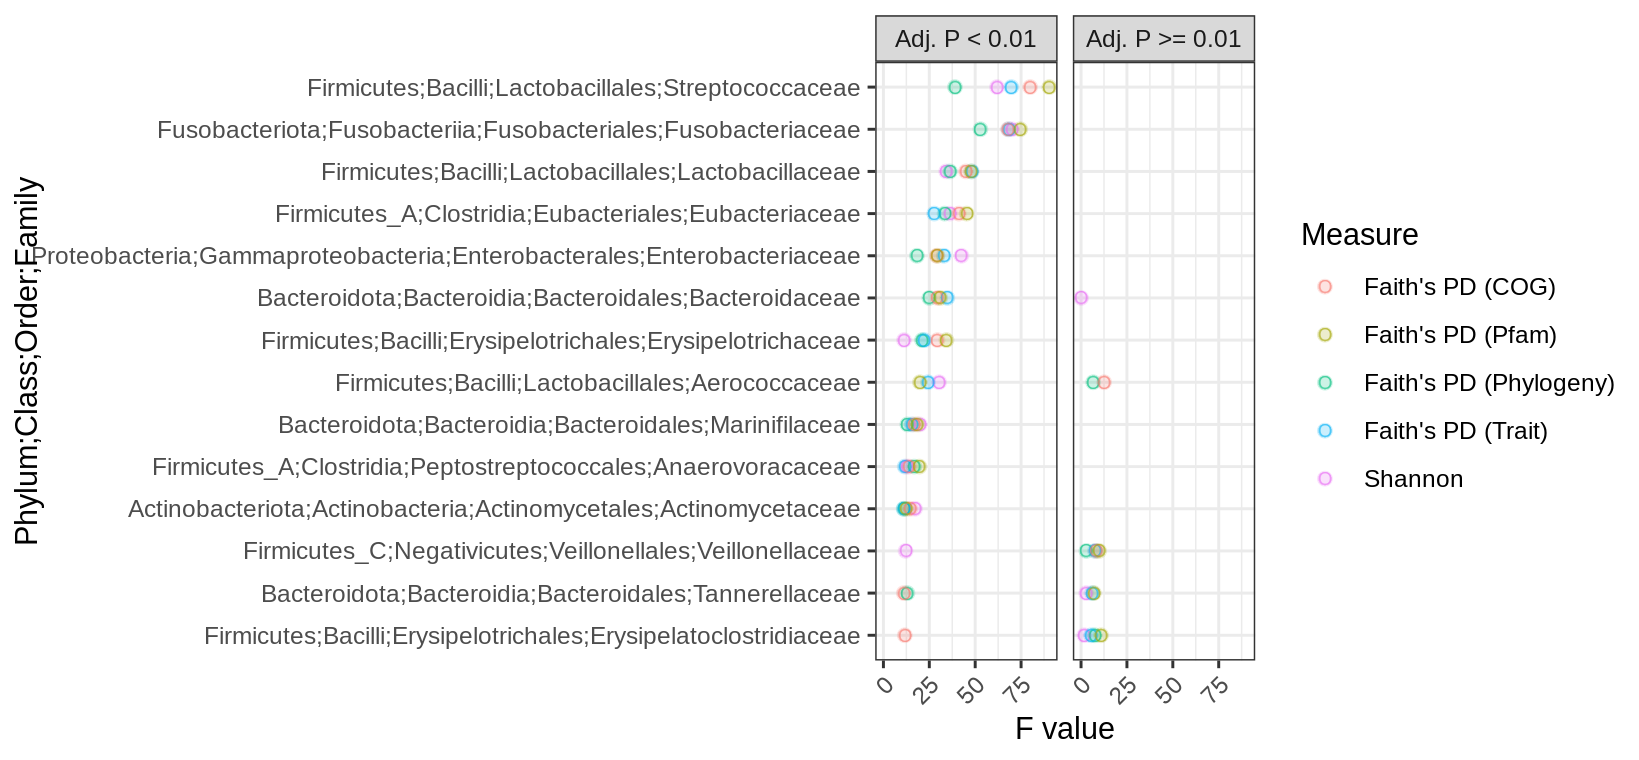

In [62]:
p = lmer_res %>%
    filter.(Variable == 'disease_status') %>%
    filter.(Metric != 'No. of obs.') %>%
    mutate.(sig = ifelse(Padj < 0.01, 'Adj. P < 0.01', 'Adj. P >= 0.01')) %>%
    mutate.(any_sig = any(Padj < 0.01), 
            .by=c(Clade)) %>%
    filter.(any_sig == TRUE) %>%
    mutate.(mean_F = mean(F_value), .by=c(Clade)) %>%
    mutate.(Clade = gsub('___', ';', Clade),
            Clade = gsub('^(Bacteria|Archaea);', '', Clade),
            Clade = Clade %>% reorder(mean_F)) %>%
    ggplot(aes(Clade, F_value, color=Metric)) +
    geom_point(size=2, alpha=0.2) +
    geom_point(size=2, alpha=0.6, shape='O') +
    scale_color_discrete('Measure') +
    facet_grid(. ~ sig) +
    labs(x='Phylum;Class;Order;Family', y='F value') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip() 
p.dims(8.2,3.8)
plot(p)

# sessionInfo

In [63]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects2/global_metagenome_diversity/envs/phyloseq-phy/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] LeyLabRMisc_0.2.0 lmerTest_3.1-3    lme4_1.1-27.1     Matrix_1.3-4     
 [5] PhyloMeasures_2.1 vegan_2.5-7       lattice_0.20-45   permute_0.9-5    
 [9] phyloseq_1.36.0   ape_5.5           tidytable_0.6.5   data.table_1.14.2
[13] ggplot2_3.3.5     tidyr_1.1.4       d